In [1]:
import scanpy as sc
import numpy as np
import os
import pandas as pd

In [5]:
adata = sc.read_h5ad('bin/combined_messmer.h5ad')

/auto/brno2/home/jiribruthans/miniforge3/envs/cxg-env/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

/auto/brno2/home/jiribruthans/miniforge3/envs/cxg-env/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 16815 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


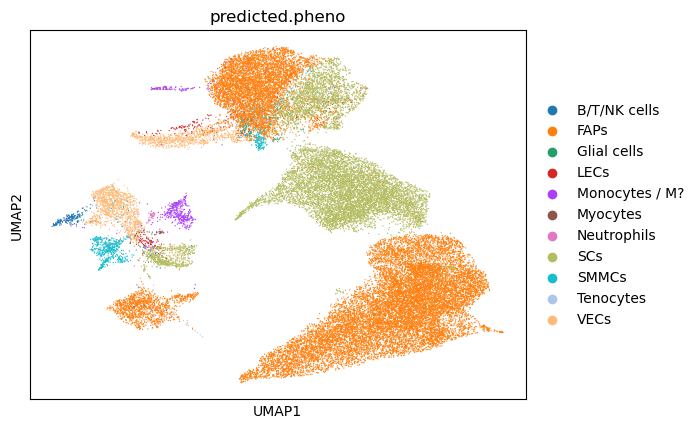

In [8]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='predicted.pheno')

In [10]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [26]:
del adata.obsm['X_umap']

In [27]:
del adata.obsm['X_pca']

In [32]:
del adata.obsp
#... atad del all that could restore old UMAP based on raw X

In [33]:
adata

AnnData object with n_obs × n_vars = 36129 × 16815
    obs: 'Unique_barcode', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Cell_barcode', 'Category', 'Genotype', 'nSNPcovered', 'nUMIS_perSNP', 'PRB.DBL', 'PRB.SNG1', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'predicted.pheno'
    layers: 'log1p_norm'

In [34]:
adata.X = adata.layers['log1p_norm']

/auto/brno2/home/jiribruthans/miniforge3/envs/cxg-env/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 16815 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


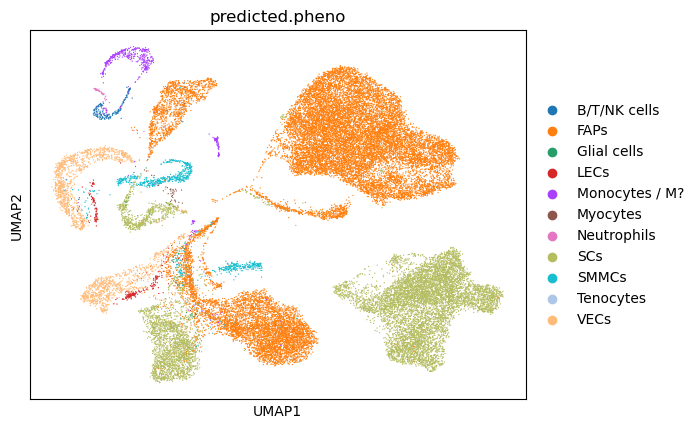

In [35]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='predicted.pheno')

In [ ]:
#it seems like messmer isn't too crazy, but also not very nice. maybe celltype predictions are not so great?